# Integration of SVM and MVO 

This notebook computes and visualizes the results of the computational experiments

In [2]:
import numpy as np
from pandas.tseries.offsets import Day, MonthBegin
pth = 'cache/Experiments/'
local_path = 'cache/Local Experiments/'
cache_path = 'cache/'
img_path = "Images/"
from python.packages import *
from python.analysis_tools import *
import pickle
%matplotlib inline
dpi_setting = 150

In [3]:
## Import Monthly Returns
rets = pd.read_pickle(cache_path + "RETS.pkl")
## Import feature vectors
wrds_svm = pd.read_pickle(cache_path + "WRDS_ASOF.pkl")
## Import Daily Prices
Prices = pd.read_pickle(cache_path + "Daily_Prices.pkl")
## Get the trade dates
StockDates = wrds_svm.reset_index().loc[:, ['Date', 'MonthStart', 'MonthEnd']].drop_duplicates()

#risk free rate data
FF_RiskFree = pd.read_csv(cache_path + "F-F_Research_Data_Factors.CSV")
FF_RiskFree.Date = pd.to_datetime(FF_RiskFree['Date'], format='%Y%m', errors='coerce')
FF_RiskFree.index = FF_RiskFree.Date
FF_RiskFree.drop(FF_RiskFree.columns[0:4], axis=1, inplace = True)

In [4]:
daily_rets = Prices.pct_change() + 1
new_index = daily_rets.index[0:-1] #VERY IMPORTANT
daily_rets.drop(daily_rets.head(1).index,inplace=True)
daily_rets.index = new_index
Prices['StartMonth'] = Prices.index + Day(1) + MonthBegin(-1)
#this calculate the month of the stock returns
daily_rets['StartMonth'] = daily_rets.index + Day(1) + MonthBegin(-1)
# daily_rets[['AAPL', 'StartMonth']].head()
# daily_rets.dropna(inplace = True)
# daily_rets.head()

In [5]:
# daily_portfolio = pd.merge(weights_mvo, daily_rets.reset_index()[['Date', 'StartMonth']], how='left', left_index = True, right_on = 'StartMonth')
# daily_portfolio.index = daily_portfolio.Date
#Rets.index.isin(StockDates.MonthStart.values)
(daily_rets).groupby('StartMonth').prod().iloc[8:].head() - 1

,AAPL,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBRA
StartMonth,,,,,,,,,,,,,,,,,,,,,
2000-07-01,-0.075030,0.149590,0.194030,-0.043729,-0.105083,-0.184231,-0.018750,-0.034648,-0.424388,0.071684,...,0.040179,-0.041758,0.080448,0.132415,-0.166544,0.005695,0.142562,-0.245399,-0.098253,0.158960
2000-08-01,0.286440,-0.007130,0.565625,0.025185,0.182414,0.552152,-0.058899,0.194307,0.386707,0.076923,...,0.086912,-0.105505,-0.053455,0.119107,0.294014,0.036879,0.014466,0.069129,0.157385,0.062344
2000-09-01,-0.617734,0.412926,0.045908,0.108381,0.204822,-0.171393,0.042857,0.076122,-0.128540,0.072135,...,-0.088809,-0.050227,-0.165289,0.100985,-0.051700,0.108334,-0.003583,-0.057692,0.031381,-0.167840
2000-10-01,-0.154641,-0.102922,-0.125954,0.107287,-0.052148,-0.291667,0.219178,-0.000965,-0.157850,-0.044117,...,-0.005797,0.009461,0.193338,-0.050657,-0.225969,0.006835,-0.001792,-0.440816,-0.016227,-0.055007
2000-11-01,-0.167680,0.107649,-0.192140,0.000000,-0.128641,-0.119748,0.151331,0.002896,0.285714,0.096923,...,-0.185131,0.096384,0.013947,0.023752,-0.406858,-0.030599,0.086176,-0.264868,0.129897,0.007463


In [9]:
from itertools import product
turnovers = ["1"] #["0_75", "1", "1_25"]
cardinalities  = ["Card09"] #["Card01", "Card03", "Card05", "Card07", "Card09"]
epsilon = 1e-3
epsilons_desc = {1e-2:"eps negative 2", 1e-3:"eps negative 3", 
                 1e-4:"eps negative 4", 1e-5:"eps negative 5"}

oot_returns_mvo_dict = {}
oot_returns_svm_dict = {}
oot_returns_adm_dict = {}
oot_returns_adm_dict2 = {}
T = 120 #len(rets.index)
cols = "_VolINV1_"
name = "no_neg"
for (turnover, card) in product(turnovers, cardinalities):

    with open(local_path + "Standard MVO Portfolios/"+turnover+"no_tlim.pkl",'rb') as fp:
        mvo_results = pickle.load(fp)
    # with open(pth + "svm_oot_results_turnover0_75by6.pkl", 'rb') as fp:
    #   svm_results = pickle.load(fp)
    with open(local_path + epsilons_desc[epsilon] + "/" + card + "_Vol_" +turnover + "no_tlim.pkl", 'rb') as fp:
        svm_results = pickle.load(fp)
    with open(local_path + epsilons_desc[epsilon] + "/" + "padm" +card+ cols +turnover + name + ".pkl", 'rb') as fp:
        adm_results = pickle.load(fp)
    
#     with open(local_path + epsilons_desc[epsilon] + "/" + "padm" +card+ "_VolINV3_" +turnover + "no_neg.pkl", 'rb') as fp:
#         adm_results2 = pickle.load(fp)

    weights_mvo, oot_returns_mvo, market_mvo, wis_mvo, bias_mvo, soln_mods_mvo = mvo_results
    weights_svm, oot_returns_svm, market_svm, wis_svm, bias_svm, soln_mods_svm = svm_results
    weights_adm, oot_returns_adm, market_adm, wis_adm, bias_adm, soln_mods_adm, times = adm_results
    # weights_adm2, oot_returns_adm2, market_adm2, wis_adm2, bias_adm2, soln_mods_adm2, times2 = adm_results2

    oot_returns_mvo_dict[(card, turnover)] = (weights_mvo.iloc[:-1]*rets).sum(axis = 1)
    oot_returns_svm_dict[(card, turnover)] = (weights_svm.iloc[:-1]*rets).sum(axis = 1)
    oot_returns_adm_dict[(card, turnover)] = (weights_adm.iloc[:-1]*rets).sum(axis = 1)
    # oot_returns_adm_dict2[(card, turnover)] = (weights_adm2.iloc[:-1]*rets).sum(axis = 1)
rf = FF_RiskFree[FF_RiskFree.index.isin(oot_returns_adm.index)]
rf = rf.RF;

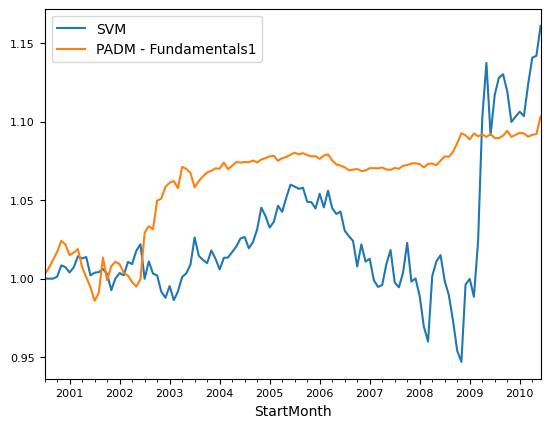

In [10]:

for (i ,j) in product(range(len(cardinalities)), range(len(turnovers))):
    turnover = turnovers[j]
    card = cardinalities[i]
    svm_wealth = wealth(oot_returns_svm_dict[(card, turnover)])
    mvo_wealth = wealth(oot_returns_mvo_dict[(card, turnover)])
    adm_wealth = wealth(oot_returns_adm_dict[(card, turnover)])
    # adm_wealth2 = wealth(oot_returns_adm_dict2[(card, turnover)])
    (svm_wealth/mvo_wealth).iloc[:T].plot(label = 'SVM', fontsize = 8)
    (adm_wealth/mvo_wealth).iloc[:T].plot(label = 'PADM - Fundamentals1', fontsize = 8)
    # (adm_wealth2/mvo_wealth).plot(label = 'PADM - Fundamentals2', fontsize = 8)
plt.legend()

In [8]:
print(weights_svm.diff().abs().sum().sum())
print(weights_adm.diff().abs().sum().sum())
print(weights_mvo.diff().abs().sum().sum())

40.19157578311368
19.833340266817206
40.33251609338862
